Three Observable Trends
------------------------------------
    1.) There appears to be a strong correlation between max temperature and latitude.
    2.) There doesn't appear to be a strong correlation between latitude and humidity, cloudiness, or wind speed.
    3.) Max temp looks to decrease as we move away from the equator, both north and south.

In [1]:
#dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from scipy import stats

#import api key
from config import weather_api_key

#incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#output file (csv)
output_data_file = "output_data/cities.csv"

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#lat_range = (-10, 4)
#lng_range = (1, 2)

#formatting for bold text
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [2]:
#printing out the minneapolis json to see the data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "minneapolis").json()
response

{'coord': {'lon': -93.26, 'lat': 44.98},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 30.6,
  'feels_like': 22.15,
  'temp_min': 28.4,
  'temp_max': 32,
  'pressure': 1015,
  'humidity': 96},
 'visibility': 16093,
 'wind': {'speed': 8.05, 'deg': 350},
 'clouds': {'all': 75},
 'dt': 1579917892,
 'sys': {'type': 1,
  'id': 5829,
  'country': 'US',
  'sunrise': 1579873284,
  'sunset': 1579907302},
 'timezone': -21600,
 'id': 5037649,
 'name': 'Minneapolis',
 'cod': 200}

In [3]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

#create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add a one second interval between queries to stay within API query limits
time.sleep(1)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

599

In [4]:
#perform api calls

#base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#build partial query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_info = []
i = 1
set_number = 1

print("Beginning Data Retrieval") 
print("--------------------------------")

for j, city in enumerate(cities):
    
    if (j % 50 == 0 and j >= 50):
        set_number = set_number + 1
        i = 0
    print(f"Processing Record {i} of Set {set_number} | {city}")
    i=i+1
   
    response = requests.get(query_url + city).json()
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    
    try:
        lat = response['coord']['lat']
        name = response['name']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lngs = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        city_info.append({"City": name,
                          "Cloudiness": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Lat": lat,
                          "Lng": lngs,
                          "Max Temp": max_temp,
                          "Wind Speed": wind_speed})
    except:
        print("City " + color.BOLD + "not " + color.END + "found. Skipping...")
        pass

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | hrodna
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | kieta
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | coquimbo
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | margate
Processing Record 11 of Set 1 | millau
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | olafsvik
Processing Record 14 of Set 1 | seoul
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | burnie
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | la ronge
Processing Record 23 

Processing Record 33 of Set 4 | komsomolskiy
Processing Record 34 of Set 4 | xiamen
Processing Record 35 of Set 4 | pochutla
Processing Record 36 of Set 4 | lalganj
Processing Record 37 of Set 4 | saint george
Processing Record 38 of Set 4 | bugene
Processing Record 39 of Set 4 | yuci
Processing Record 40 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 4 | belyy yar
Processing Record 42 of Set 4 | thompson
Processing Record 43 of Set 4 | presidencia roque saenz pena
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | saldanha
Processing Record 46 of Set 4 | sola
Processing Record 47 of Set 4 | tocopilla
Processing Record 48 of Set 4 | bajo baudo
City not found. Skipping...
Processing Record 49 of Set 4 | san patricio
Processing Record 0 of Set 5 | victoria
Processing Record 1 of Set 5 | dakar
Processing Record 2 of Set 5 | rovaniemi
Processing Record 3 of Set 5 | upernavik
Processing Record 4 of Set 5 | hasaki
Processing R

Processing Record 17 of Set 8 | gayny
Processing Record 18 of Set 8 | medak
Processing Record 19 of Set 8 | tucurui
Processing Record 20 of Set 8 | praia da vitoria
Processing Record 21 of Set 8 | cidreira
Processing Record 22 of Set 8 | umm kaddadah
Processing Record 23 of Set 8 | berlevag
Processing Record 24 of Set 8 | onokhino
Processing Record 25 of Set 8 | ancud
Processing Record 26 of Set 8 | mendahara
City not found. Skipping...
Processing Record 27 of Set 8 | daru
Processing Record 28 of Set 8 | arrecife
Processing Record 29 of Set 8 | moindou
Processing Record 30 of Set 8 | saleaula
City not found. Skipping...
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | soyo
Processing Record 33 of Set 8 | srednekolymsk
Processing Record 34 of Set 8 | severo-kurilsk
Processing Record 35 of Set 8 | bubaque
Processing Record 36 of Set 8 | semey
Processing Record 37 of Set 8 | zhigansk
Processing Record 38 of Set 8 | mareeba
Processing Record 39 of Set 8 

Processing Record 8 of Set 12 | hami
Processing Record 9 of Set 12 | qiongshan
Processing Record 10 of Set 12 | avera
Processing Record 11 of Set 12 | akdagmadeni
Processing Record 12 of Set 12 | katangli
Processing Record 13 of Set 12 | putina
Processing Record 14 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 15 of Set 12 | tiznit
Processing Record 16 of Set 12 | angra
City not found. Skipping...
Processing Record 17 of Set 12 | anar darreh
City not found. Skipping...
Processing Record 18 of Set 12 | tabulbah
City not found. Skipping...
Processing Record 19 of Set 12 | marawi
Processing Record 20 of Set 12 | meadow lake
Processing Record 21 of Set 12 | great yarmouth
Processing Record 22 of Set 12 | palmas
Processing Record 23 of Set 12 | koygorodok
Processing Record 24 of Set 12 | hokitika
Processing Record 25 of Set 12 | lugo
Processing Record 26 of Set 12 | zyryanka
Processing Record 27 of Set 12 | puerto escondido
Processing Record 28 of Set 12 | bestobe
Proc

In [45]:
#export the city data into a csv
#display the dataframe

city_df = pd.DataFrame(city_info)

city_df.to_csv('cities.csv', encoding="utf-8", index_label="City_ID")

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tasiilaq,100,GL,1579917988,45,65.61,-37.64,23.00,18.34
1,Hrodna,100,BY,1579917989,87,53.69,23.83,35.28,14.54
2,Constitucion,0,CL,1579917942,63,-35.33,-72.42,57.33,5.99
3,Port Alfred,0,ZA,1579917982,94,-33.59,26.89,64.99,1.01
4,Esperance,40,AU,1579917992,57,-33.87,121.90,75.20,3.36


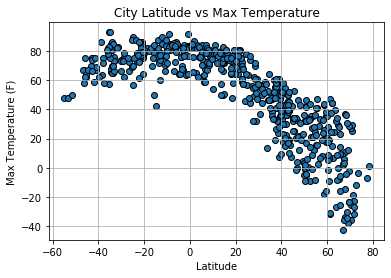

In [46]:
#plot latitude v temperature
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#save scatter plot to images folder
plt.savefig(os.path.join("Images","Temp_v_Latitude.png"))

**CODE:**  This code is utilizing www.openweathermap.org to gather data on cities around the globe.  We specifically called for info on city name, latitudes, longitudes, cloudiness, humidity, wind speed, country and date.  For the above scatter plot, we looked at max temperature versus the city latitude.

**ANALYSIS:**  This scatter plot is interesting.  We would expect to see what's shown graphically as we move along the x-axis from the right towards the equator.  One might expect to see a similar shape moving from the left side of the x-axis towards the equator. Perhaps due to bias in the selection; or perhaps the temperature isn't as symmetric as one might think.

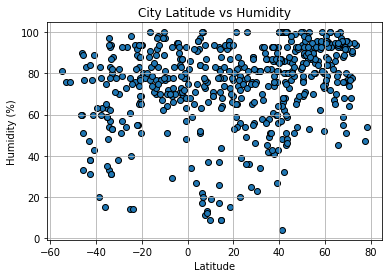

In [50]:
#plot latitude v humidity
x_values = city_df["Lat"]
y_values = city_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Humidity_v_Latitude.png"))

**CODE:**  For the above scatter plot, we looked at humidity relative to city latitude, using Matplotlib.

**ANALYSIS:**  There doesn't appear to be a correlation between humidity and latitude; still need statistical evidence though.

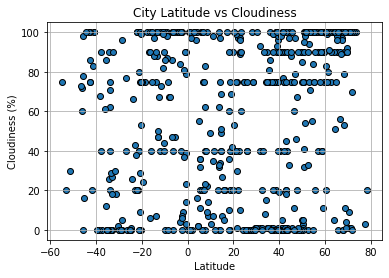

In [51]:
#plot latitude v cloudiness
x_values = city_df["Lat"]
y_values = city_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Cloudiness_v_Latitude.png"))

**CODE:**  Used Matplot to plot cloudiness versus latitude.

**ANALYSIS:**  Doesn't initially appear to be a strong correlation between cloudiness and latitude.  It's interesting to see clusters of similar cloudiness along a spectrum of latitude.  I would not have expected that.  Worth exploring further?

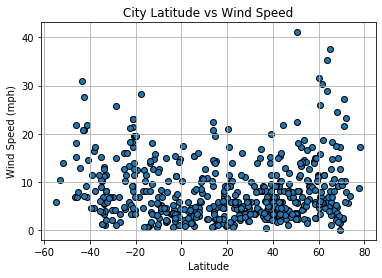

In [52]:
#plot latitude v wind speed
x_values = city_df["Lat"]
y_values = city_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Wind_Speed_v_Latitude.png"))

**CODE:**  Made a scatter plot of latitude versus wind speed using Matplotlib.

**ANALYSIS:**  Without being well-versed in global weather patterns, it makes intuitive sense that a majority of the wind speed lies between 0 and 30.  Does not appear to be a statistical correlation between latitude and wind speed. 

In [53]:
#run linear regressions on the above relationships, by hemisphere
#max temp (F) v latitude
#humidity (%) v latitude
#cloudiness (%) v latitude
#wind speed (mph) v latitude

In [54]:
#create northern hemisphere dataframe

#logic test/conditional statement returns a series of boolean values; make sure on the right track
northern_hem = city_df["Lat"] >= 0

#locate where the 'Lat' values are >= 0; reset index for cleaner formatting
northern_df = city_df.loc[city_df["Lat"] >= 0, :].reset_index()

#get rid of newly created 'index' column resulting from above code
northern_df = northern_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tasiilaq,100,GL,1579917988,45,65.61,-37.64,23.00,18.34
1,Hrodna,100,BY,1579917989,87,53.69,23.83,35.28,14.54
2,Margate,54,GB,1579917998,93,51.38,1.39,43.00,8.05
3,Arrondissement de Millau,33,FR,1579917999,86,44.08,2.92,42.01,5.82
4,Olafsvik,100,IS,1579918001,89,64.89,-23.71,29.14,37.67


In [55]:
#create southern hemisphere dataframe

#logic test for my own knowledge; not necessarily needed to create the dataframe
southern_hem = city_df["Lat"] < 0

#create southern hemisphere dataframe
southern_df = city_df.loc[city_df["Lat"] < 0, :].reset_index()
southern_df = southern_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Constitucion,0,CL,1579917942,63,-35.33,-72.42,57.33,5.99
1,Port Alfred,0,ZA,1579917982,94,-33.59,26.89,64.99,1.01
2,Esperance,40,AU,1579917992,57,-33.87,121.90,75.20,3.36
3,Kieta,0,PG,1579917993,66,-6.22,155.63,86.59,7.96
4,Ushuaia,75,AR,1579917995,81,-54.80,-68.30,48.20,5.82


Text(0, 0.5, 'Max Temperature')

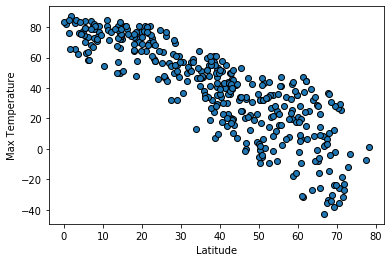

In [56]:
#run linear regression on max temp v latitude (northern hemisphere)

#first create scatter plot
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

In [57]:
#perform a linear regression on temp v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0       5.490886
1      20.658599
2      23.597979
3      32.886930
4       6.407057
         ...    
370    25.099481
371    42.850285
372     5.707204
373    72.155017
374    38.027665
Name: Lat, Length: 375, dtype: float64


In [58]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.27x +88.98


The r-squared is: -0.8479770116399263


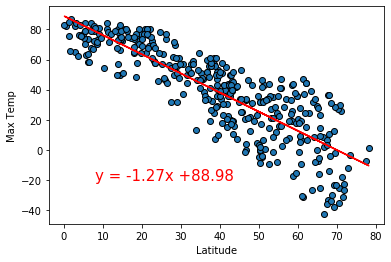

In [59]:
#create plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(8,-20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#save plot to images folder
plt.savefig(os.path.join("Images","Northern_Temp_v_Latitude.png"))

#show plot
plt.show()

Text(0, 0.5, 'Max Temperature')

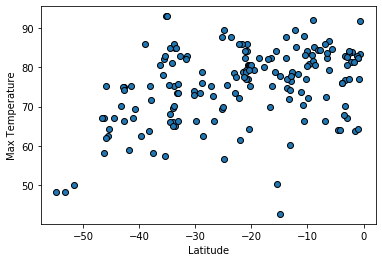

In [60]:
#run linear regression on max temp v lat (southern hemisphere)

#create scatter plot
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

In [61]:
#perform a linear regression on temp v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      72.034998
1      72.485180
2      72.412737
3      79.566500
4      66.997610
         ...    
167    80.430643
168    71.802145
169    80.490150
170    74.694697
171    75.897771
Name: Lat, Length: 172, dtype: float64


In [62]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.26x +81.18


The r-squared is: 0.38357807638597874


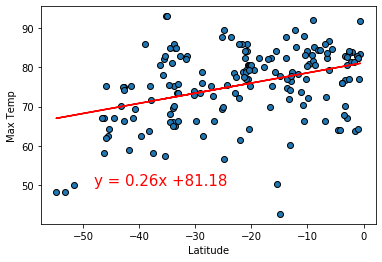

In [64]:
#create plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-48,50),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#save scatter plot to images folder
plt.savefig(os.path.join("Images","Southern_Temp_v_Latitude.png"))

#show plot
plt.show()

**ANALYSIS:**
**_Max Temp v Latitude_**     
The linear regressions for both hemispheres follow what common sense would dictate.  As you approach the equator, heading south, the max temperatures increase.  Similary, approaching the equator heading north, the max temps increase.  For both hemispheres, the farther distance a location is from the equator, the colder the max temperature.  The reason that the linear regressions have opposite-signed slopes is due to the nature of the latitude coordinates (ie North Pole is at 90 degrees, South Pole is at -90 degrees).  Finally, our r-values do indicate there is a correlation.  

Text(0, 0.5, 'Humidity')

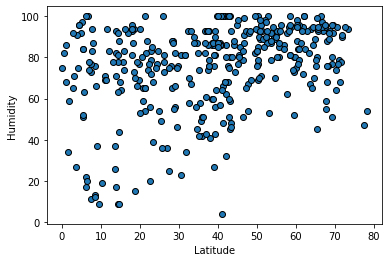

In [65]:
#run linear regression on humidity v lat (northern hemisphere)

#create scatter plot
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [66]:
#perform a linear regression on humidity v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      84.738058
1      80.679647
2      79.893159
3      77.407722
4      84.492919
         ...    
370    79.491403
371    74.741836
372    84.680178
373    66.900794
374    76.032220
Name: Lat, Length: 375, dtype: float64


In [67]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.34x +62.4


The r-squared is: 0.32863190157433453


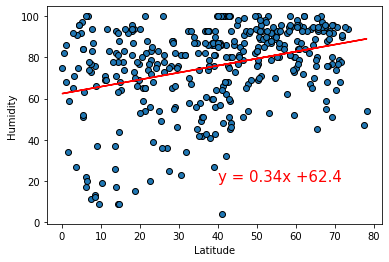

In [68]:
#create Plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#save plot to images folder
plt.savefig(os.path.join("Images","Northern_Humidity_v_Latitude.png"))

#show plot
plt.show()

Text(0, 0.5, 'Humidity')

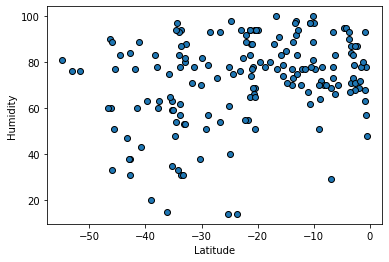

In [69]:
#plot linear regression on humidity v lat (southern hemisphere)

#create scatter plot
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [70]:
#perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      67.341441
1      68.015996
2      67.907447
3      78.626670
4      59.793403
         ...    
167    79.921506
168    66.992534
169    80.010671
170    71.326744
171    73.129434
Name: Lat, Length: 172, dtype: float64


In [71]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.39x +81.04


The r-squared is: 0.2858685935679971


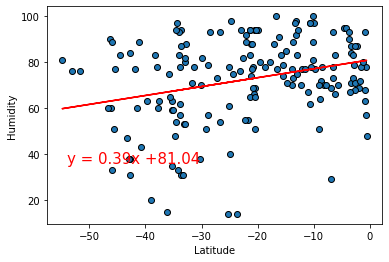

In [72]:
#create plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-54,36),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#save to images folder
plt.savefig(os.path.join("Images","Southern_Humidity_v_Latitude.png"))

#show plot
plt.show()

**ANALYSIS:**
**_Humidity v Latitude_**     
The r-values for both hemispheres are low, indicating there is not a strong correlation between humidity and latitude.  Perhaps there would be a stronger correlation if we narrowed down latitude and added in longitutde.  But across the entirety of the globe, our r-value indicates there is not a strong correlation.

Text(0, 0.5, 'Cloudiness')

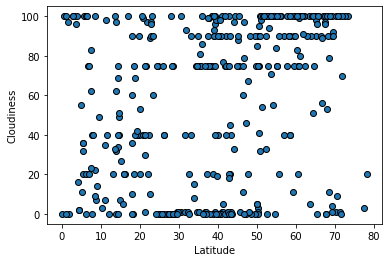

In [73]:
#plot cloudiness v lat linear regression (northern hemisphere)

x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [74]:
#perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      70.189798
1      63.757047
2      62.510431
3      58.570911
4      69.801243
         ...    
370    61.873632
371    54.345370
372    70.098056
373    41.916992
374    56.390683
Name: Lat, Length: 375, dtype: float64


In [75]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.54x +34.78


The r-squared is: 0.2711063866110548


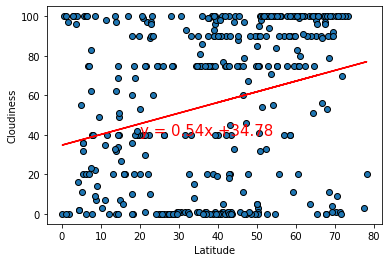

In [76]:
#create Plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Northern_Cloudiness_v_Latitude.png"))

#show plot
plt.show()

Text(0, 0.5, 'Cloudiness')

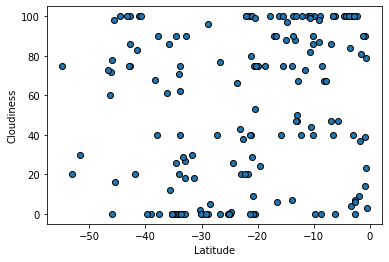

In [77]:
#plot cloudiness v lat linear regression (southern hemisphere)

x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [78]:
#perform a linear regression on cloudiness v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      44.715261
1      45.764815
2      45.595921
3      62.274175
4      32.971117
         ...    
167    64.288835
168    44.172389
169    64.427570
170    50.916073
171    53.720915
Name: Lat, Length: 172, dtype: float64


In [79]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.6x +66.03


The r-squared is: 0.2165429790983658


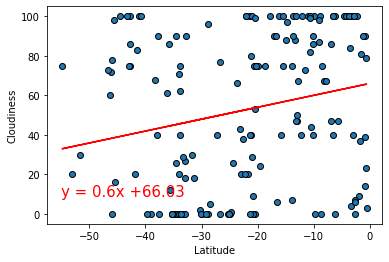

In [82]:
#create Plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-55,9),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Southern_Cloudiness_v_Latitude.png"))

#show plot
plt.show()

**ANALYSIS:**
**_Cloudiness v Latitude_**     
Similar to humidity v latitude, our r-values are low for both hemispheres when charting cloudiness v latitude.  Again, my guess is we could correlate cloudiness with other markers, just not latitude (alone).

Text(0, 0.5, 'Wind Speed')

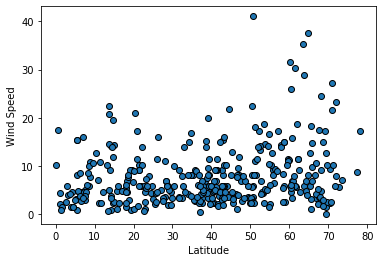

In [83]:
#plot wind speed v lat linear regression (northern hemisphere)

x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [84]:
#perform a linear regression on wind speed v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      9.462962
1      8.688983
2      8.538992
3      8.064995
4      9.416211
         ...   
370    8.462373
371    7.556584
372    9.451923
373    6.061220
374    7.802673
Name: Lat, Length: 375, dtype: float64


In [85]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.06x +5.2


The r-squared is: 0.2137802988804749


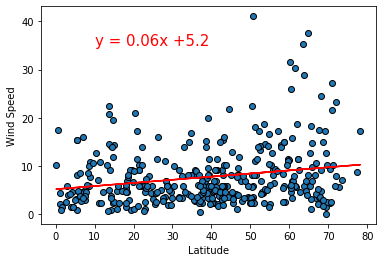

In [86]:
#create Plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,35),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Northern_WindSpeed_v_Latitude.png"))

#show plot
plt.show()

Text(0, 0.5, 'Wind Speed')

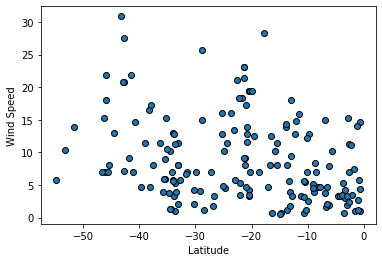

In [87]:
#plot wind speed v lat linear regression (southern hemisphere)

x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [88]:
#perform a linear regression on wind speed v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      10.755167
1      10.518145
2      10.556287
3       6.789818
4      13.407361
         ...    
167     6.334845
168    10.877765
169     6.303514
170     9.354831
171     8.721410
Name: Lat, Length: 172, dtype: float64


In [89]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.14x +5.94


The r-squared is: -0.2926935800365392


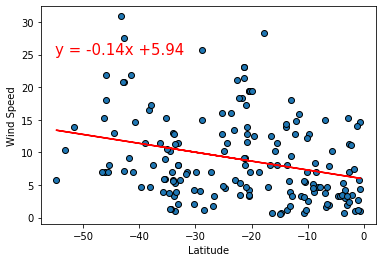

In [91]:
#create plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#save scatter plot to images folder
plt.savefig(os.path.join("Images","Southern_WindSpeed_v_Latitude.png"))

#show plot
plt.show()

**ANALYSIS:**
**_Wind Speed v Latitude_**     
Yet again, we have low r-values, indicating a weak correlation between wind speed and latitude, across both hemispheres.  When looking at the relationships we've analyzed, the strongest correlation appears between temperature and latitude.
